In [2]:
import pandas as pd
from scipy.stats import shapiro


df=pd.read_csv('Alzheimers Mice Data.csv')

df.head()


,AD_Status,Treatment,Training,Memory
0,1,1,12,10
1,1,1,15,12
2,1,1,13,13
3,1,1,12,10
4,1,1,14,13


# Assumption 3

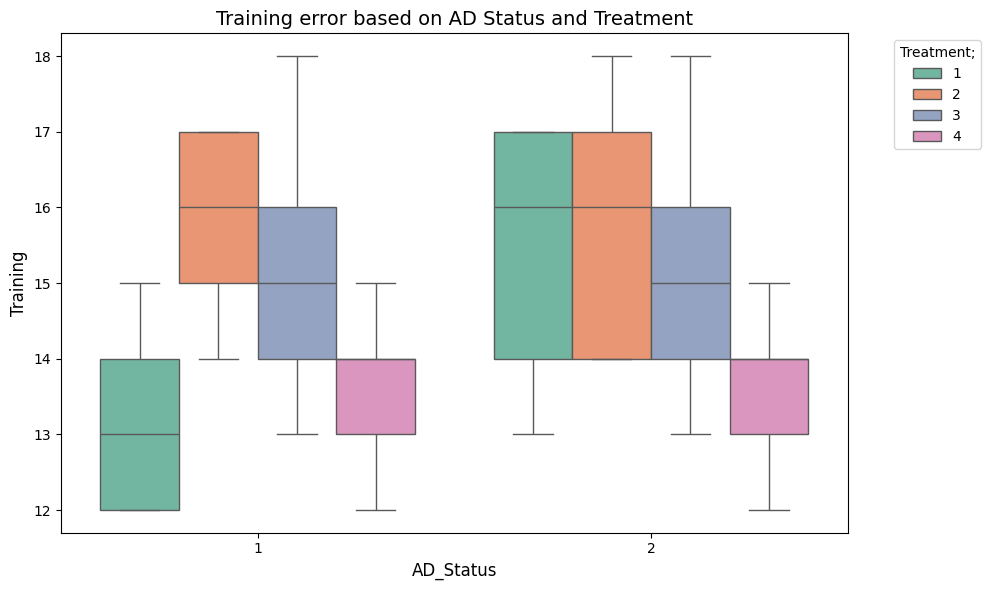

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))

sns.boxplot(x='AD_Status', y='Training', hue='Treatment', data=df, palette="Set2", dodge=True)

plt.title("Training error based on AD Status and Treatment", fontsize=14)
plt.xlabel("AD_Status", fontsize=12)
plt.ylabel("Training", fontsize=12)
plt.legend(title="Treatment;", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Normality Test


In [3]:
from IPython.display import display


normality ={}
for i in df['Treatment'].unique():
    for j in df['AD_Status'].unique():
        group_normal=df[(df['Treatment'] == i) & (df['AD_Status'] == j)]['Training']
        stat, p_value = shapiro(group_normal)
        normality[(int(i), int(j))] = {'Statistic': float(stat), 'p-value': float(p_value)}

display(normality)

{(1, 1): {'Statistic': 0.9020198201298117, 'p-value': 0.42114965351611855},
 (1, 2): {'Statistic': 0.866835872224429, 'p-value': 0.2538464637612434},
 (2, 1): {'Statistic': 0.9020198201298121, 'p-value': 0.42114965351612},
 (2, 2): {'Statistic': 0.8939244932314427, 'p-value': 0.3772224660924305},
 (3, 1): {'Statistic': 0.9787161500642191, 'p-value': 0.9276364233495382},
 (3, 2): {'Statistic': 0.9787161500642191, 'p-value': 0.9276364233495382},
 (4, 1): {'Statistic': 0.9608589992013118, 'p-value': 0.8139521277236892},
 (4, 2): {'Statistic': 0.9608589992013118, 'p-value': 0.8139521277236892}}

# Levene's Test

In [5]:
from scipy.stats import levene


group_levene = [df[(df['Treatment'] == i) & (df['AD_Status'] == j)]['Training']
          for i in df['Treatment'].unique() for j in df['AD_Status'].unique()]

levene_stat, levene_p = levene(*group_levene)
float(levene_stat), float(levene_p)
print(f"Statistic: {levene_stat} p-value: {levene_p}")

Statistic: 0.43460764587525136 p-value: 0.87305057808911


# ANOVA Test

In [8]:
import statsmodels.api as sm 
from statsmodels.formula.api import ols 
model = ols('Training ~ C(AD_Status) * C(Treatment)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

anova_table

,sum_sq,df,F,PR(>F)
C(AD_Status),3.025,1.0,1.216080,0.278356
C(Treatment),28.275,3.0,3.788945,0.019678
C(AD_Status):C(Treatment),9.075,3.0,1.216080,0.319771
Residual,79.600,32.0,NaN,NaN


# Post Hoc

In [18]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd


tukey_results = pairwise_tukeyhsd(df['Training'], df['Treatment'])
tukey_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,1.5,0.172,-0.4223,3.4223,False
1,3,0.9,0.5931,-1.0223,2.8223,False
1,4,-0.7,0.7612,-2.6223,1.2223,False
2,3,-0.6,0.8347,-2.5223,1.3223,False
2,4,-2.2,0.0196,-4.1223,-0.2777,True
3,4,-1.6,0.1314,-3.5223,0.3223,False
